<a href="https://colab.research.google.com/github/Riton02/TP1/blob/main/roblot_tp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>Ouvrir le notebook dans Colab en modifiant le début de son adresse dans le navigateur :<br>
il faut remplacer **github.com** par **githubtocolab.com**.<br>
Une fois vos réponses apportées, le notebook devra être sauvegardé dans GitHub, dans le repository du TP :<br>
*Fichier > Enregistrer une copie dans Github*<br>
*Info-TSI-Vieljeux/tpx-votre_nom*<br>

---

# TP 1 : Recherche séquentielle dans un tableau unidimensionnel. Dictionnaires.

1.   Élément de liste
2.   Élément de liste



## Recherche d'un élément dans une liste

Écrire une fonction `recherche` qui prend pour argument un élément et une liste et qui retourne `True` si l'élément est présent et `False` sinon.<br>
Le corps de la fonction devra comprendre une boucle.

In [77]:
def recherche(x,L) :
    '''
    recherche(x: tout type, L : list) -> bool
    '''
    for i in L:
      if x==i:
        return True
    return False

In [78]:
# Cellule d'évaluation (ne pas modifier)

In [79]:
L=[1,2,3,5,7,4,6,8]
recherche (6,L)

True

Dans le pire des cas (élément ne se trouvant pas dans la liste), combien de comparaisons doit-on opérer pour savoir si un élément est présent dans une liste de taille 400&nbsp;?

In [80]:
# noter votre réponse en affectant à la variable nb le nombre de comparaisons calculé
nb = 400

In [ ]:
# Cellule d'évaluation (ne pas modifier)

Construisez une fonction `dico` qui prend en argument une liste `L` de $n$ entiers inférieurs à $n$ et qui retourne un dictionnaire de longueur $n$ dont les clés sont les $n$ premiers entiers (de 0 à $n$-1) et les valeurs comptent le nombre de fois que la clé est présente dans la liste.<br>
Exemple :<br>
s'il y a 2 fois l'élément 18 dans la liste `L`, alors `dico(L)[18]==2`, et si l'élément 97 n'est pas présent dans la liste, alors `dico(L)[97]==0`.

In [ ]:
from random import randint 

def dico(L) :
    '''
    dico(L : list) -> dict
    précondition : si la longueur de L vaut n, alors L ne contient que des entiers < n
    '''
    n= len(L)
    D= {}
    for i in range(n):
      D[i]=0
    for e in L:
      D[e]+=1
    return D
    

In [ ]:
# Cellule d'évaluation (ne pas modifier)

In [ ]:
dico([1,4,2,1,2,4])

{0: 0, 1: 2, 2: 2, 3: 0, 4: 2, 5: 0}

Définissons une fonction `recherche_dico` qui vérifie si un entier est bien présent :

In [ ]:
def recherche_dico(e,dic) :
    '''
    recherche_dico(e : int, dic : dict) -> bool
    '''
    if dic[e] >= 1 :
        return True
    else :
        return False
    
# Exemple d'utilisation :
L = [5,2,3,1,2,0,2]
dic = dico(L)
(recherche_dico(3,dic),recherche_dico(4,dic))

(True, False)

L'intérêt de `recherche-dico` est d'aller beaucoup plus vite que `recherche` comme le montre le graphe suivant (l'execution du code peut prendre quelques secondes) :

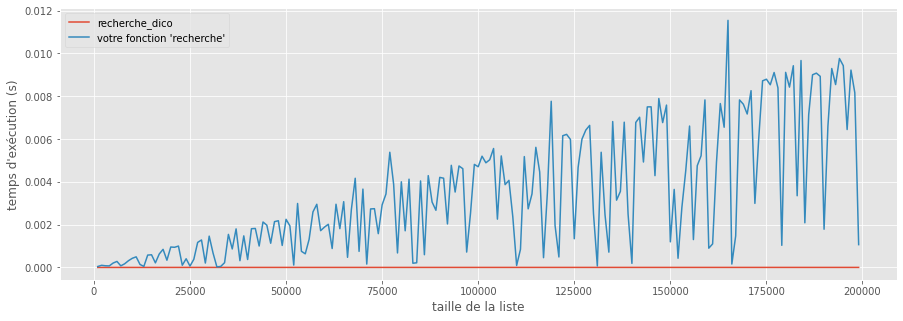

In [ ]:
from time import time
from random import randint
import matplotlib.pyplot as plt
plt.style.use('ggplot')

I, T_ch, T_dico = [], [], []

for i in range(1000,200000,1000) :
    L = []
    L = [randint(0,i-1) for k in range(i)] # randint(i,j) retourne un entier dans {i;...;j}
    # la liste L contient i éléments tirés au hasard entre 0 et i-1
    dic = dico(L)                          # on crée un dictionnaire à partir de L grâce à la fonction 'dico'
    element = randint(0,i-1)               # 'element' est un entier tiré au hasard entre 0 et i-1
    start = time()                         # on note l'heure exacte
    recherche(element,L)
    stop1 = time()
    recherche_dico(element,dic)
    stop2 = time()
    T_ch.append(stop1-start)
    T_dico.append(stop2-stop1)
    I.append(i)

plt.figure(figsize = (15,5))
plt.plot(I,T_dico,label="recherche_dico")
plt.plot(I,T_ch,label="votre fonction 'recherche'")
plt.xlabel('taille de la liste')
plt.ylabel("temps d'exécution (s)")
plt.legend()

## Recherche d'un maximum

Écrire une fonction `maximum` qui prend pour argument une liste et qui retourne le plus grand élément de la liste.<br>
(Interdiciton d'utiliser la fonction native `max` évidemment)

In [94]:
def maximum(L) :
    '''
    maximum(L : list) -> float ou int
    '''
    maxi=L[0]
    for e in L:
        if e>=maxi:
            maxi= e
    return maxi 

In [45]:
# Cellule d'évaluation (ne pas modifier)

In [44]:
# Cellule d'évaluation (ne pas modifier)

In [95]:
maximum([1,4,6,7,90])

90

Que se passera-t-il si on passe la liste suivante `[1,3,'a',-2]` en argument à `maximum` ?<br>

In [ ]:
maximum([1,3,'a',-2])

TypeError: ignored

Pour éviter cela, vous devrez tester en amont que la liste donnée en argument contient bien que des nombres.<br>
Rappel : `type(3)` renvoie `int` et `type(2.8)` renvoie `float`.<br>
Vous placerez un `assert` en début de fonction prévenant l'utilisateur que la liste contient des types farfelus.

In [ ]:
def maximum_secure(L) :
    '''
    maximum(L : list) -> float ou int
    la fonction lève une 'AsserionError' si la liste ne contient pas que des nombres
    '''
    # VOTRE CODE

In [ ]:
# Cellule d'évaluation (ne pas modifier)

In [ ]:
# Vous pouvez tester votre fonction dans cette cellule


Construisez maintenant une fonction `max_2` qui retourne le deuxième maximum défini comme le plus grand élément strictement inférieur au maximum (s'il y a plusieurs éléments ayant la valeur maximale, il ne faut pas retourner un de ceux-là).<br>
Votre fonction `max_2` devra utiliser votre ancienne fonction `maximum`.

In [ ]:
def max_2(L) :
    '''
    maximum_2(L : list) -> float ou int
    précondition : L est une liste de nombres
    postcondition : la fonction retourne le plus grand élément strictement plus petit que le max de la liste.
    '''
    # VOTRE CODE

In [ ]:
# Cellule d'évaluation (ne pas modifier)

In [ ]:
# Vous pouvez tester votre fonction dans cette cellule


Ci-dessous est représentée l'évolution du temps d'exécution de la fonction native `max` ainsi que de la fonction `maximum` (si vous avez réussi à l'implémenter) en fonction de la taille de la liste en argument.<br>
On remarque que cette évolution est linéaire : l'augmentation du temps d'exécution semble proportionnelle à l'augmentation de la taille de la liste.<br>
Rq : les blocs introduit par `try` et `except` ne sont là que pour gérer l'éventualité que vous n'ayez pas une fonction `maximum` opérationnelle.

In [ ]:
I, T_max, T_maximum = [], [], []
for i in range(50000,1000000,50000) :
    L = []
    for k in range(i) :
        L += [randint(0,k)]
        # randint(i,j) retourne un entier dans {i;...;j}
    start1 = time()
    max(L)
    stop1 = time()
    T_max.append(stop1-start1)
    start2 = time()
    maximum(L)
    stop2 = time()
    T_maximum.append(stop2-start2)
    I.append(i)

plt.figure(figsize = (15,5))
plt.plot(I,T_max,label="la fonction Python 'max'")
plt.plot(I,T_maximum,label="votre fonction 'maximum'")

plt.xlabel('taille de la liste')
plt.ylabel("temps d'exécution (s)")
plt.legend()

Ajoutez la fonction `max_2` à ce graphe et répondre dans la cellule suivante si oui ou non, le temps d'exécution de `max_2` semble dépendre linéairement de la taille de la liste.<br>

In [ ]:
# si votre réponse est oui, la variable s doit se voir affecter la chaîne de caractères 'OUI' et sinon, la chaîne 'NON'.
s = '...'

In [ ]:
# Cellule d'évaluation (ne pas modifier)